Useful links: 
Parse tutorial: https://support.parsebiosciences.com/hc/en-us/articles/360052794312-Scanpy-Tutorial-65k-PBMCs
AnnData tutorial: https://scverse-tutorials.readthedocs.io/en/latest/notebooks/anndata_getting_started.html


In [8]:
# ! pip3 install scanpy
# ! pip3 install anndata
# ! pip3 install pooch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 2.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.1/196.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 8.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [ ]:
ip3 install scanpy
# ! pip3 install anndata
# ! pip3 install pooch

In [12]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

# Data retrieval 
import pooch

# From Parse 
import numpy as np
import pandas as pd
# import scanpy as sc
import scipy
import os
import scipy.io as sio

In [11]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [15]:
data_path = "/Users/ianschrack/Desktop/parse_analysis_10882-IS/all-sample/DGE_filtered/"

In [23]:
adata = sc.read_mtx(data_path + 'count_matrix.mtx')

# Read in gene & cell data
gene_data = pd.read_csv(data_path + "all_genes.csv")
cell_meta = pd.read_csv(data_path + "cell_metadata.csv")

# Find genes with nan values and filter
gene_data = gene_data[gene_data.gene_name.notnull()]
notNA = gene_data.index
notNA = notNA.to_list()

# Remove genes with nan values and assign gene names
adata = adata[:,notNA]
adata.var = gene_data
adata.var.set_index('gene_name', inplace = True)
adata.var_names_make_unique()

# Add cell meta data to anndata object
adata.obs = cell_meta
adata.obs.set_index('bc_wells', inplace=True)
adata.obs.index.name = None
adata.obs_names_make_unique()

sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=5)

# Returns the dimensions of the expression matrix (cells, genes)
adata.shape


(49244, 28815)

In [57]:

# Quality control

# Calculate and add mitochondrial DNA
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)



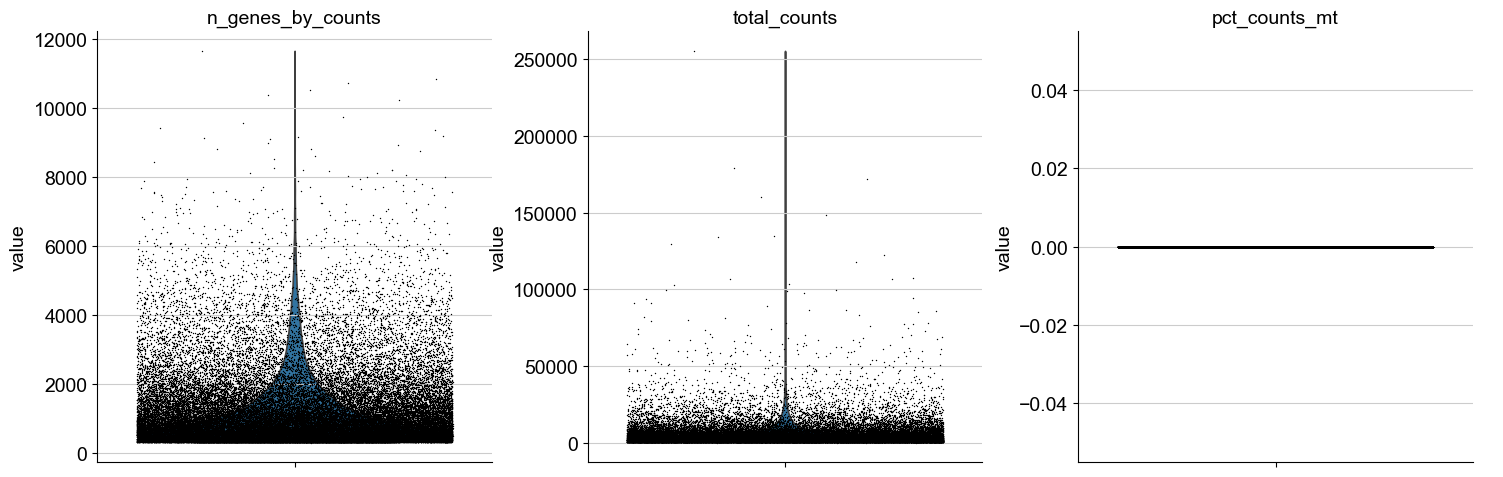

In [58]:
sc.pl.violin(adata, ['n_genes_by_counts', "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)

In [ ]:
adata.obs

,sample,species,gene_count,tscp_count,mread_count,bc1_wind,bc2_wind,bc3_wind,bc1_well,bc2_well,bc3_well,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mt
01_01_30__s1,10882-IS-1,GRCm39-tdTomato,1048,5775,33480,1,1,30,A1,A1,C6,1048,1048,5775.0,0.0,0.0,6.955593,8.661467,0.0
01_01_40__s1,10882-IS-1,GRCm39-tdTomato,452,2002,10297,1,1,40,A1,A1,D4,452,452,2002.0,0.0,0.0,6.115892,7.602401,0.0
01_01_64__s1,10882-IS-1,GRCm39-tdTomato,1224,3139,19892,1,1,64,A1,A1,F4,1224,1224,3139.0,0.0,0.0,7.110696,8.051978,0.0
01_02_38__s1,10882-IS-1,GRCm39-tdTomato,1468,7766,45401,1,2,38,A1,A2,D2,1468,1468,7766.0,0.0,0.0,7.292337,8.957640,0.0
01_03_33__s1,10882-IS-1,GRCm39-tdTomato,1067,4959,28643,1,3,33,A1,A3,C9,1067,1067,4959.0,0.0,0.0,6.973543,8.509161,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09_92_40__s8,10882-IS-9,GRCm39-tdTomato,833,2174,13369,9,92,40,A9,H8,D4,833,833,2174.0,0.0,0.0,6.726233,7.684784,0.0
09_95_57__s8,10882-IS-9,GRCm39-tdTomato,1146,2721,17384,9,95,57,A9,H11,E9,1146,1146,2721.0,0.0,0.0,7.044905,7.909122,0.0
09_95_65__s8,10882-IS-9,GRCm39-tdTomato,604,916,6503,9,95,65,A9,H11,F5,604,604,916.0,0.0,0.0,6.405228,6.821107,0.0
09_96_43__s8,10882-IS-9,GRCm39-tdTomato,1894,5688,34481,9,96,43,A9,H12,D7,1894,1893,5687.0,0.0,0.0,7.546446,8.646114,0.0


In [61]:
# Filter the data
adata = adata[adata.obs.n_genes_by_counts < 5000,:]
adata = adata[adata.obs.total_counts < 20000,:]
adata = adata[adata.obs.pct_counts_mt < 15,:]
adata.shape # Checking number of cells remaining

(18469, 28815)

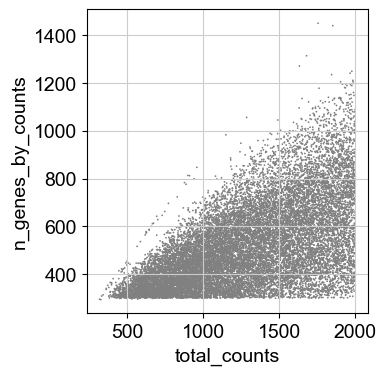

In [62]:
sc.pl.scatter(adata, x = 'total_counts', y = 'n_genes_by_counts')